# 어제 짠 mnist code 이것저것 바꿔보기 (조별 과제): early stopping 해보기

In [1]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Affinity\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
tf.set_random_seed(777)
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate=0.001
training_epochs = 10
batch_size=100

X=tf.placeholder(tf.float32, [None,784])
X_img = tf.reshape(X,[-1,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])

W0716 09:57:22.112666  5960 deprecation.py:323] From <ipython-input-2-fb0175b21b5f>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0716 09:57:22.113659  5960 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0716 09:57:22.114650  5960 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:


Extracting MNIST_data/train-images-idx3-ubyte.gz


W0716 09:57:22.462843  5960 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0716 09:57:22.466314  5960 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0716 09:57:22.529306  5960 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a fu

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025A1E630F98>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025A1DF4F2B0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025A1E63F390>)

In [4]:
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7*7*64])

W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L3_flat = tf.reshape(L3, [-1, 7*7*128])

# Final FC 7x7x64 inputs -> 10 outputs
W4 = tf.get_variable("W4", shape=[7*7*128,10], 
                    initializer=tf.contrib.layers.xavier_initializer())
b=tf.Variable(tf.random_normal([10]))

In [10]:
L3_flat

<tf.Tensor 'Reshape_2:0' shape=(?, 6272) dtype=float32>

In [9]:
W3

<tf.Variable 'Variable_2:0' shape=(3, 3, 64, 128) dtype=float32_ref>

In [7]:
W4

<tf.Variable 'W4:0' shape=(6272, 10) dtype=float32_ref>

In [8]:
b

<tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>

In [5]:
logits = tf.matmul(L3_flat, W4 )+ b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [6]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes some time.')
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c/total_batch
        
    print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

Learning started. It takes some time.


InvalidArgumentError: Input to reshape is a tensor with 204800 values, but the requested shape requires a multiple of 6272
	 [[node Reshape_2 (defined at <ipython-input-4-38b6ec929f61>:16) ]]

Errors may have originated from an input operation.
Input Source operations connected to node Reshape_2:
 MaxPool_2 (defined at <ipython-input-4-38b6ec929f61>:15)

Original stack trace for 'Reshape_2':
  File "C:\Users\Affinity\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Affinity\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Affinity\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\Affinity\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\Affinity\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 708, in __init__
    self.run()
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-38b6ec929f61>", line 16, in <module>
    L3_flat = tf.reshape(L3, [-1, 7*7*128])
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 9093, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels
}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits,1), feed_dict={X: mnist.test.images[r:r+1]}))
sess.close()

### 코드 설명 잘 되어있는 블로그 : https://webnautes.tistory.com/1236

## 고수준 api사용 코드 (mnist) : 케라스에 조금 더 가까워지는 과정

In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("./mnist/data/", one_hot=True)
# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None,28,28,1])
Y = tf.placeholder(tf.float32, [None,10])
is_training = tf.placeholder(tf.bool)

# 기본적으로 inputs, output size, kernel_size만 넣어주면
# 크게 신경쓰지 앟아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X,32,[3,3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1,[2,2],[2,2])
L1 = tf.layers.dropout(L1, 0.3, is_training)

L2 = tf.layers.conv2d(L1, 64, [3,3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2,2], [2,2])
L2 = tf.layers.dropout(L2, 0.3, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.3, is_training)

model = tf.layers.dense(L3, 10, activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [17]:
# 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1,28,28,1)
        _, cost_val = sess.run([optimizer,cost], 
                              feed_dict = {X:batch_xs, 
                                          Y:batch_ys, 
                                          is_training:True})
        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch+1), 
         'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.1770
Epoch: 0002 Avg. cost = 0.0498
Epoch: 0003 Avg. cost = 0.0339
Epoch: 0004 Avg. cost = 0.0253
Epoch: 0005 Avg. cost = 0.0183
Epoch: 0006 Avg. cost = 0.0157
Epoch: 0007 Avg. cost = 0.0123
Epoch: 0008 Avg. cost = 0.0104
Epoch: 0009 Avg. cost = 0.0077
Epoch: 0010 Avg. cost = 0.0076
Epoch: 0011 Avg. cost = 0.0059
Epoch: 0012 Avg. cost = 0.0054
Epoch: 0013 Avg. cost = 0.0048
Epoch: 0014 Avg. cost = 0.0044
Epoch: 0015 Avg. cost = 0.0063
최적화 완료!


In [18]:
# 결과 확인
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, 
                      feed_dict = {X: mnist.test.images.reshape(-1,28,28,1), 
                                  Y: mnist.test.labels, 
                                  is_training: False}))

정확도: 0.9885


In [19]:
total_batch

550

# Keras 실습: https://github.com/gilbutITbook/006975/blob/master/5.1-introduction-to-convnets.ipynb 

In [25]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## 5-2: 데이터 규모가 작을 때 어떻게 cnn 할것인가

In [26]:
import os, shutil

In [27]:
# 원본 데이터셋을 합축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

In [28]:
# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir): # 반복적인 실행을 위해 디렉터리를 삭제합니다.
    shutil.rmtree(base_dir) # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [29]:
# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사합니다.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

# 그 다음 500개의 강아지 이미지를 validation 으로
fnames =['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
# 그 다음 500개의 강아지 이미지를 test로

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [30]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


### 네트워크 구성하기: Conv2D (relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷을 만듦

In [31]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', 
                       input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

### 층들을 거치면서 특성 맵의 차원이 어떻게 변하는지 살펴보겠습니다.

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics=['acc'])

W0717 09:23:28.619721 15032 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 09:23:28.624224 15032 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0717 09:23:28.628649 15032 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 데이터 전처리

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

NameError: name 'train_dir' is not defined

In [13]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

NameError: name 'train_generator' is not defined

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

NameError: name 'train_generator' is not defined

In [15]:
model.save('cats_and_dogs_small_1.h5')

W0717 09:23:29.494727 15032 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [16]:
import matplotlib.pyplot as plt

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

### 데이터 증식 사용하기

In [33]:
import keras
keras.__version__
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                            height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True,
                            fill_mode='nearest')

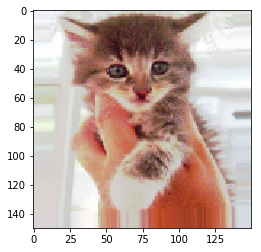

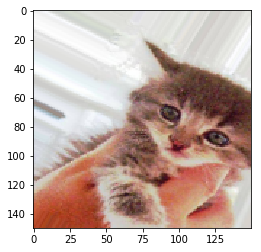

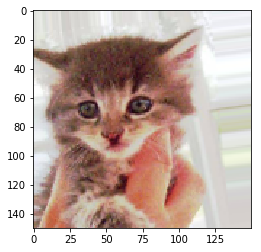

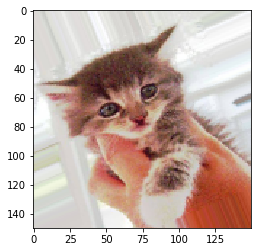

In [34]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지를 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150,150))

# (150,150,3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1,150,150,3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
        
plt.show()

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', 
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

W0717 09:27:15.179285 15032 deprecation.py:506] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150), 
                                                       batch_size=32,
                                                       class_mode='binary')
history = model.fit_generator(train_generator, 
                             steps_per_epoch=100, 
                             epochs=100, 
                             validation_data=validation_generator, 
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 74s 740ms/step - loss: 0.6924 - acc: 0.5116 - val_loss: 0.6773 - val_acc: 0.5730
Epoch 2/100
100/100 [==============================] - 75s 747ms/step - loss: 0.6785 - acc: 0.5622 - val_loss: 0.6700 - val_acc: 0.5503
Epoch 3/100
100/100 [==============================] - 75s 752ms/step - loss: 0.6614 - acc: 0.5981 - val_loss: 0.7061 - val_acc: 0.5577
Epoch 4/100
100/100 [==============================] - 73s 733ms/step - loss: 0.6317 - acc: 0.6375 - val_loss: 0.8119 - val_acc: 0.5213
Epoch 5/100
100/100 [==============================] - 74s 739ms/step - loss: 0.6302 - acc: 0.6503 - val_loss: 0.6166 - val_acc: 0.6561
Epoch 6/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6132 - acc: 0.6603 - val_loss: 0.6561 - val_acc: 0.6095
Epoch 7/100
100/100 [==============================] - 74s 741ms/step - loss: 0.6087 - acc: 0.6784 -

100/100 [==============================] - 81s 810ms/step - loss: 0.4215 - acc: 0.7994 - val_loss: 0.4300 - val_acc: 0.8084
Epoch 61/100
100/100 [==============================] - 82s 824ms/step - loss: 0.4071 - acc: 0.8181 - val_loss: 0.4283 - val_acc: 0.8003
Epoch 62/100
100/100 [==============================] - 87s 868ms/step - loss: 0.4032 - acc: 0.8172 - val_loss: 0.5271 - val_acc: 0.7779
Epoch 63/100
100/100 [==============================] - 78s 782ms/step - loss: 0.4132 - acc: 0.8097 - val_loss: 0.4923 - val_acc: 0.7867
Epoch 64/100
100/100 [==============================] - 83s 835ms/step - loss: 0.4099 - acc: 0.8091 - val_loss: 0.4363 - val_acc: 0.8080
Epoch 65/100
100/100 [==============================] - 82s 824ms/step - loss: 0.4061 - acc: 0.8134 - val_loss: 0.4548 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 82s 817ms/step - loss: 0.3902 - acc: 0.8237 - val_loss: 0.4429 - val_acc: 0.7957
Epoch 67/100
100/100 [==============================] 

KeyboardInterrupt: 

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()